In [0]:
blob_account_name = "storageequipe3"
blob_container_name = "raw"
blob_relative_path = "/"
blob_sas_token = r"sp=r&st=2022-03-20T14:38:53Z&se=2022-03-20T22:38:53Z&spr=https&sv=2020-08-04&sr=c&sig=os4hBDZyXU8dYFkDHGP1wugiImKg7lDxLw0O4Awu2wQ%3D"
arquivo = "hackathon_transaction.parquet"

In [0]:
wasbs_path = 'wasbs://%s@%s.blob.core.windows.net/%s' % (blob_container_name, blob_account_name, blob_relative_path)
spark.conf.set('fs.azure.sas.%s.%s.blob.core.windows.net' % (blob_container_name, blob_account_name), blob_sas_token)
#print('Remote blob path: ' + wasbs_path)

df = spark.read.parquet('wasbs://raw@storageequipe3.blob.core.windows.net/hackathon_transaction.parquet')
df.createOrReplaceTempView('source')


In [0]:
df.display()

date,issuer_id,account_id,source_id,segment,depositwithdrawalflag,debitacctcountry,creditacctcountry,transaction_value,transaction_currencycode,transactiontype,accesschannel,processingchannel,onusflag,reversalindicator,score_adpt_falcon,rule_name,product,fraud_flag,account_age,age,gender,marital_status,city,state,addresses_types,documents_types
2021-07-02,0bad865a02d82f4970687ffe1b80822b76cc0626,12c6fc06c99a462375eeb3f43dfd832b08ca9e17,4d134bc072212ace2df385dae143139da74ec0ef,Score,Q = Saque/Retirada de recurso,076,076,12000.0,986,D = Pagamento único com atraso/vencimento antecipado,G = Pagamento iniciado usando o canal de tokenização,E = Transferência eletrônica de fundos (não especificado em outro lugar),E,Não é uma reversão,NULL,Nega_TedOut_10K,TED,0,366,null,null,null,Florianopolis,SC,Residencial,cpf
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,10.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,1.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,10.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,1.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,1.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,10.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-05-04,52fdb9f68c503e11d168fe52035901864c0a4861,e54183e2a040e6c09e61eb22d542e3d57074b351,bcf814ab41506290ab1b8158ebda6ee61b4bb579,Score,D = Depósito/Entrada de recurso,076,076,1.0,NULL,U = Transferência/pagamento imediato único e urgente,G = Pagamento iniciado usando o canal de tokenização,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,NULL,Lista_PixIn_Qtd,PIX,0,491,null,null,null,São Paulo,SP,Residencial,rg
2021-03-01,5d23e965603269f7674c2fc33318f5d5af406f6f,ca3799b8ff860c55da009a5675031b8644cdf7e3,6643521711328a1e282daf5a5da43970eb11a089,modelSTUB,Q = Saque/Retirada de recurso,076,076,0.9

In [0]:
df_pandas = df.toPandas()

In [0]:
df_pandas['fraud_flag'].value_counts()

Out[7]: 0 332667
1 1717
Name: fraud_flag, dtype: int64

In [0]:
df_pandas.describe()

Out[8]:

,transaction_value,fraud_flag,account_age,age
count,3.343840e+05,334384.000000,334384.000000,0.0
mean,7.335683e+03,0.005135,281.548914,NaN
std,2.446259e+06,0.071474,135.483724,NaN
min,1.000000e-02,0.000000,1.000000,NaN
25%,1.585000e+01,0.000000,200.000000,NaN
50%,4.728000e+01,0.000000,258.000000,NaN
75%,1.650000e+02,0.000000,320.000000,NaN
max,1.000000e+09,1.000000,1375.000000,NaN


In [0]:
df_pandas.describe(include = 'O')

Out[9]:

,date,issuer_id,account_id,source_id,segment,depositwithdrawalflag,debitacctcountry,creditacctcountry,transaction_currencycode,transactiontype,accesschannel,processingchannel,onusflag,reversalindicator,score_adpt_falcon,rule_name,product,gender,marital_status,city,state,addresses_types,documents_types
count,334384,334384,334384,334384,334384,334384,334384,334384,123711,334384,334384,334384,334384,334384,321856,334384,334384,0,0,333638,333638,333638,334384
unique,363,57,54225,57522,2,3,2,2,2,3,3,4,3,4,622,246,5,0,0,5378,39,4,5
top,2021-12-13,5d23e965603269f7674c2fc33318f5d5af406f6f,f4cc5bc52436baa9505b2d60911299bbd560a79a,1b6453892473a467d07372d45eb05abc2031647a,Score,Q = Saque/Retirada de recurso,076,076,NULL,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Nao é uma reversao,2,Lista_Fora_Horario_Corte,PIX,NaN,NaN,São Paulo ...,SP,Residencial,rg
freq,8433,275080,589,1059,307311,323014,331786,331786,111542,327076,213185,322215,318299,213255,127736,273953,322215,NaN,NaN,31027,107461,332989,165043


In [0]:
df_pandas['transaction_currencycode'].unique()

Out[86]: array(['986', 'NULL', None], dtype=object)

In [0]:
df_pandas.isna().sum()

Out[10]: date 0
issuer_id 0
account_id 0
source_id 0
segment 0
depositwithdrawalflag 0
debitacctcountry 0
creditacctcountry 0
transaction_value 0
transaction_currencycode 210673
transactiontype 0
accesschannel 0
processingchannel 0
onusflag 0
reversalindicator 0
score_adpt_falcon 12528
rule_name 0
product 0
fraud_flag 0
account_age 0
age 334384
gender 334384
marital_status 334384
city 746
state 746
addresses_types 746
documents_types 0
dtype: int64

In [0]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334384 entries, 0 to 334383
Data columns (total 27 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 date 334384 non-null object 
 1 issuer_id 334384 non-null object 
 2 account_id 334384 non-null object 
 3 source_id 334384 non-null object 
 4 segment 334384 non-null object 
 5 depositwithdrawalflag 334384 non-null object 
 6 debitacctcountry 334384 non-null object 
 7 creditacctcountry 334384 non-null object 
 8 transaction_value 334384 non-null float64
 9 transaction_currencycode 123711 non-null object 
 10 transactiontype 334384 non-null object 
 11 accesschannel 334384 non-null object 
 12 processingchannel 334384 non-null object 
 13 onusflag 334384 non-null object 
 14 reversalindicator 334384 non-null object 
 15 score_adpt_falcon 321856 non-null object 
 16 rule_name 334384 non-null object 
 17 product 334384 non-null object 
 18 fraud_flag 334384 non-null int32 
 19 account_age 334384 non-null int32 
 20 age 0 non-null float64
 21 gender 0 non-null object 
 22 marital_status 0 non-null object 
 23 city 333638 non-null object 
 24 state 333638 non-null object 
 25 addresses_types 333638 non-null object 
 26 documents_types 334384 non-null object 
dtypes: float64(2), int32(2), object(23)
memory usage: 66.3+ MB

In [0]:
Q1 = df_pandas2['transaction_value'].quantile(0.25)
Q3 = df_pandas2['transaction_value'].quantile(0.75)
IQR = Q3 - Q1

#df_outliers = df_pandas[(df_pandas['transaction_value'] < Q1-(IQR*1.5)) | (df_pandas['transaction_value'] > Q3+(IQR*1.5))]
df_outliers = df_pandas[(df_pandas['transaction_value'] > Q3+(IQR*1.5))]

df_outliers_fraud = df_outliers.query('fraud_flag == 1')

Out[91]:

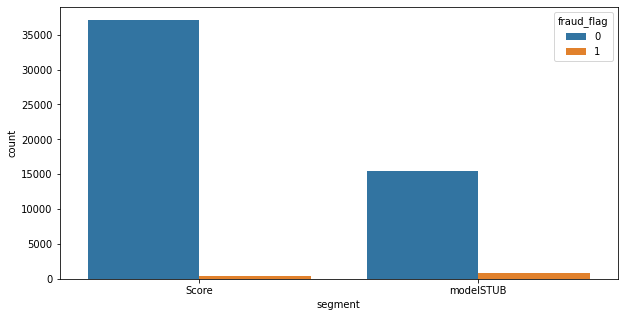

<AxesSubplot:xlabel='segment', ylabel='count'>

In [0]:
sns.countplot(data=df_outliers, x='segment', hue='fraud_flag')

Out[92]:

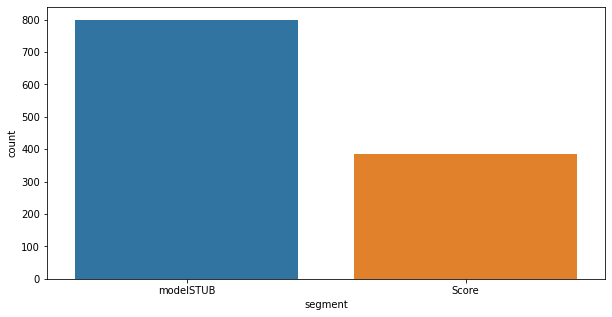

<AxesSubplot:xlabel='segment', ylabel='count'>

In [0]:
sns.countplot(data=df_outliers_fraud, x='segment')

In [0]:
df_pandas2 = df_pandas.drop(['date','issuer_id', 'account_id', 'source_id', 'debitacctcountry', 'creditacctcountry', 'transaction_currencycode', 'age', 'gender',	'marital_status', 'product', 'score_adpt_falcon'], axis = 1)

In [0]:
df_pandas2.corr()

Out[63]:

,transaction_value,fraud_flag,account_age
transaction_value,1.000000,0.017198,0.002585
fraud_flag,0.017198,1.000000,0.040904
account_age,0.002585,0.040904,1.000000


In [0]:
df_pandas2.isna().sum()

Out[64]: segment 0
depositwithdrawalflag 0
transaction_value 0
transactiontype 0
accesschannel 0
processingchannel 0
onusflag 0
reversalindicator 0
rule_name 0
fraud_flag 0
account_age 0
city 746
state 746
addresses_types 746
documents_types 0
dtype: int64

In [0]:
df_pandas2.query('fraud_flag == 1').isna().sum()

Out[65]: segment 0
depositwithdrawalflag 0
transaction_value 0
transactiontype 0
accesschannel 0
processingchannel 0
onusflag 0
reversalindicator 0
rule_name 0
fraud_flag 0
account_age 0
city 6
state 6
addresses_types 6
documents_types 0
dtype: int64

In [0]:
df_pandas2.dropna(axis = 0, inplace = True)
df_pandas2['fraud_flag'].value_counts()

Out[66]: 0 331927
1 1711
Name: fraud_flag, dtype: int64

In [0]:
df_pandas2.head()

Out[67]:

,segment,depositwithdrawalflag,transaction_value,transactiontype,accesschannel,processingchannel,onusflag,reversalindicator,rule_name,fraud_flag,account_age,city,state,addresses_types,documents_types
0,Score,Q = Saque/Retirada de recurso,12000.0,D = Pagamento único com atraso/vencimento ante...,G = Pagamento iniciado usando o canal de token...,E = Transferência eletrônica de fundos (não es...,E,Não é uma reversão,Nega_TedOut_10K,0,366,Florianopolis ...,SC,Residencial,cpf
1,Score,D = Depósito/Entrada de recurso,10.0,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,Lista_PixIn_Qtd,0,491,São Paulo ...,SP,Residencial,rg
2,Score,D = Depósito/Entrada de recurso,1.0,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,Lista_PixIn_Qtd,0,491,São Paulo ...,SP,Residencial,rg
3,Score,D = Depósito/Entrada de recurso,10.0,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,Lista_PixIn_Qtd,0,491,São Paulo ...,SP,Residencial,rg
4,Score,D = Depósito/Entrada de recurso,1.0,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,Lista_PixIn_Qtd,0,491,São Paulo ...,SP,Residencial,rg


In [0]:
df_amostra = df_pandas2.groupby('fraud_flag').apply(lambda x: x.sample(n = 1711, replace = False))
df_amostra.reset_index(inplace = True, drop = True)
df_amostra.head()

Out[68]:

,segment,depositwithdrawalflag,transaction_value,transactiontype,accesschannel,processingchannel,onusflag,reversalindicator,rule_name,fraud_flag,account_age,city,state,addresses_types,documents_types
0,Score,Q = Saque/Retirada de recurso,22.28,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Nao é uma reversao,Lista_Fora_Horario_Corte,0,329,Piraí do Sul ...,PR,Residencial,cnpj
1,Score,Q = Saque/Retirada de recurso,22.18,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,Lista_Fora_Horario_Corte,0,295,Lucas do Rio Verde ...,MT,Residencial,rg
2,modelSTUB,Q = Saque/Retirada de recurso,100.00,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Não é uma reversão,Lista_PixOut_Hora,0,480,Guarujá ...,SP,Residencial,rg
3,Score,Q = Saque/Retirada de recurso,39.80,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Nao é uma reversao,Lista_Fora_Horario_Corte,0,294,Volta Redonda ...,RJ,Residencial,inscricao_estadual
4,Score,Q = Saque/Retirada de recurso,40.61,U = Transferência/pagamento imediato único e u...,G = Pagamento iniciado usando o canal de token...,P = Pagamentos mais rápidos (UK only),E,Nao é uma reversao,Lista_Fora_Horario_Corte,0,295,Juiz de Fora ...,MG,Residencial,rg


In [0]:
df_amostra['fraud_flag'].value_counts()

Out[69]: 0 1711
1 1711
Name: fraud_flag, dtype: int64

In [0]:
x = df_amostra.drop(['fraud_flag'], axis = 1)
y = df_amostra['fraud_flag']


In [0]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
c = ['segment', 'depositwithdrawalflag', 'transactiontype', 'accesschannel', 'processingchannel', 'onusflag', 'reversalindicator', 'rule_name', 'city', 'state', 'addresses_types', 'documents_types']

for cc in c:
    x[cc] = label.fit_transform(x[cc])

In [0]:
x.head()

Out[72]:

,segment,depositwithdrawalflag,transaction_value,transactiontype,accesschannel,processingchannel,onusflag,reversalindicator,rule_name,account_age,city,state,addresses_types,documents_types
0,0,2,22.28,1,0,3,0,0,7,329,731,18,2,0
1,0,2,22.18,1,1,3,0,1,7,295,536,12,2,4
2,1,2,100.00,1,1,3,0,1,22,480,379,26,2,4
3,0,2,39.80,1,0,3,0,0,7,294,1044,19,2,2
4,0,2,40.61,1,0,3,0,0,7,295,513,10,2,4


In [0]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, shuffle = True, test_size = 0.3, stratify = y) 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([('clf', RandomForestClassifier(n_estimators = 100))])
score = cross_val_score(pipeline, x, y, cv = 5, scoring = 'accuracy', verbose = 0, n_jobs = 2)
print(score.mean(), score.std())

0.9155448841080804 0.008037232284861053

In [0]:
pipeline.fit(x_treino, y_treino)
y_pred = pipeline.predict(x_teste)

In [0]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
print(classification_report(y_teste, y_pred))

precision recall f1-score support

 0 0.97 0.87 0.92 514
 1 0.88 0.97 0.93 513

 accuracy 0.92 1027
 macro avg 0.93 0.92 0.92 1027
weighted avg 0.93 0.92 0.92 1027

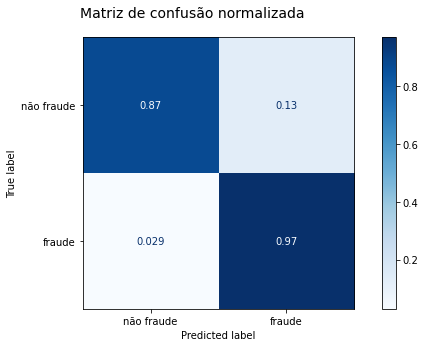

In [0]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['não fraude', 'fraude']
np.set_printoptions(precision=2)
plt.rcParams['figure.figsize'] = [10, 5]
disp = plot_confusion_matrix(pipeline, x_teste, y_teste,display_labels=labels,cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title('Matriz de confusão normalizada', fontsize=14, y=1.05, loc='left', x=-0.01)
plt.grid(False)
plt.show()

In [0]:
Q1 = df_pandas2['transaction_value'].quantile(0.25)
Q3 = df_pandas2['transaction_value'].quantile(0.75)
IQR = Q3 - Q1

#df_outliers = df_pandas[(df_pandas['transaction_value'] < Q1-(IQR*1.5)) | (df_pandas['transaction_value'] > Q3+(IQR*1.5))]
df_outliers = df_pandas[(df_pandas['transaction_value'] > Q3+(IQR*1.5))]

df_outliers_fraud = df_outliers.query('fraud_flag == 1')

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt

Out[90]:

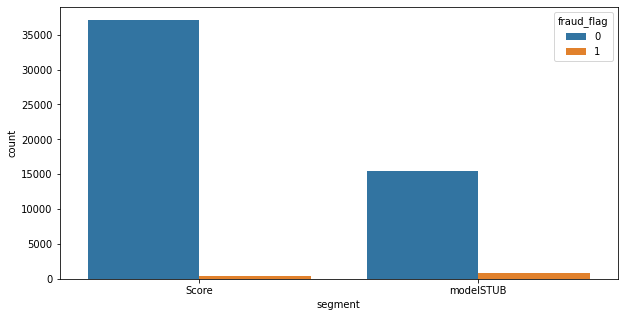

<AxesSubplot:xlabel='segment', ylabel='count'>

In [0]:
sns.countplot(data=df_outliers, x='segment', hue='fraud_flag')